In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('../Data/t-shirts.csv')

print(df.describe())
print(df.info())

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB
None


In [143]:
label_encoders = {}
# for column in df.columns:
#     if df[column].dtype == 'object':
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])
#         label_encoders[column] = le
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [139]:
size_mapping = {index: label for index, label in enumerate(label_encoders['size'].classes_)}
print("Size column mapping:", size_mapping)

material_mapping = {index: label for index, label in enumerate(label_encoders['material'].classes_)}
print("Material column mapping:", material_mapping)

color_mapping = {index: label for index, label in enumerate(label_encoders['color'].classes_)}
print("Color column mapping:", color_mapping)

sleeves_mapping = {index: label for index, label in enumerate(label_encoders['sleeves'].classes_)}
print("Sleeves column mapping:", sleeves_mapping)

demand_mapping = {index: label for index, label in enumerate(label_encoders['demand'].classes_)}
print("Demand column mapping:", demand_mapping)

Size column mapping: {0: '3XL', 1: 'L', 2: 'M', 3: 'S', 4: 'XL', 5: 'XS', 6: 'XXL'}
Material column mapping: {0: 'cotton', 1: 'linen', 2: 'nylon', 3: 'polyester', 4: 'silk'}
Color column mapping: {0: 'black', 1: 'blue', 2: 'cream', 3: 'green', 4: 'navy', 5: 'orange', 6: 'red', 7: 'violet', 8: 'white', 9: 'yellow'}
Sleeves column mapping: {0: 'long', 1: 'short'}
Demand column mapping: {0: 'high', 1: 'low', 2: 'medium'}


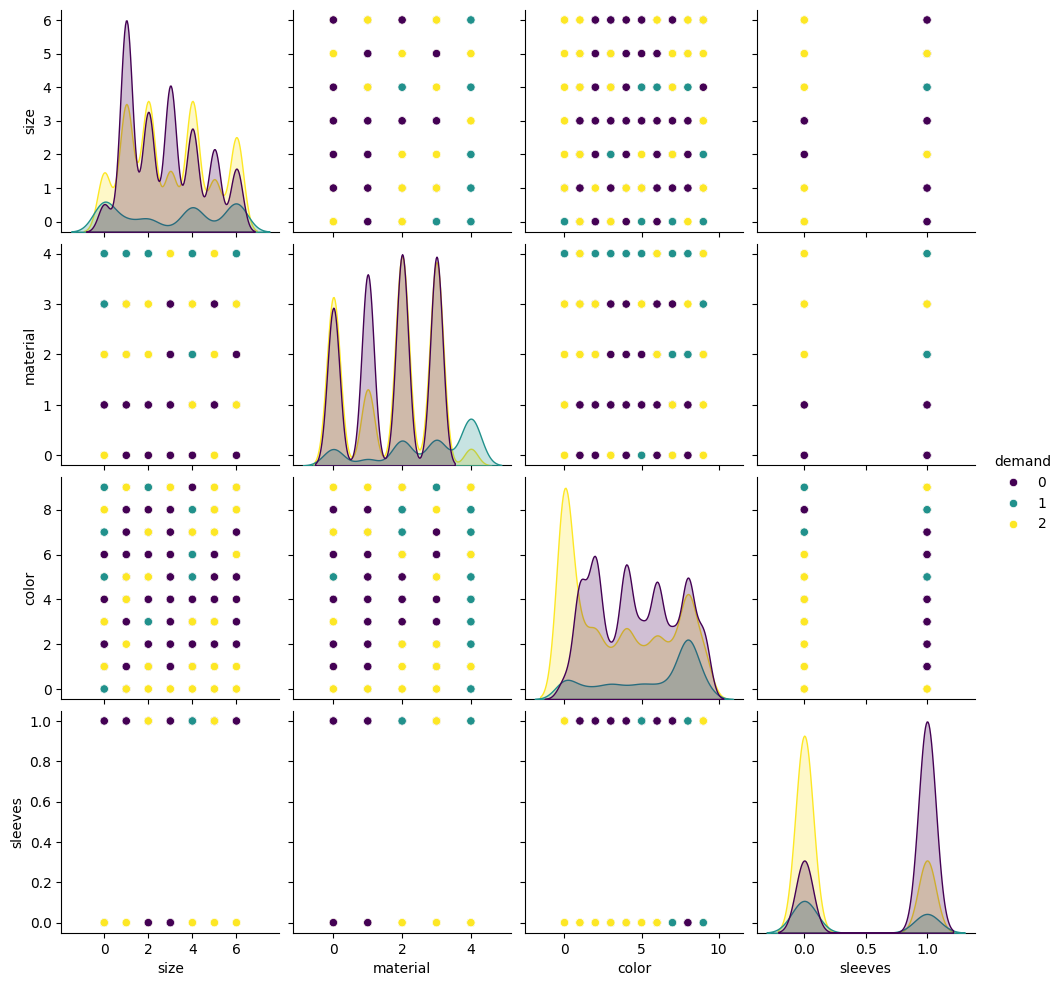

In [141]:
# demand_mapping = {0: 'low', 1: 'medium', 2: 'high'}
# df['demand'] = df['demand'].map(demand_mapping)

# custom_palette = {'low': 'blue', 'medium': 'green', 'high': 'red'}
# Create the pairplot with the custom palette
import os
from pathlib import Path

plot = sns.pairplot(df, hue='demand', palette="viridis")
chartFilePath = Path('C:\\Users\\Kris\\Documents\\Studia\\Semestr_VI\\Sztuczna_inteligencja\\Laboratorium\\Lab_4_machine_learning\\Charts\\seaborn_pairplot.png')
if os.path.isfile(chartFilePath):
    os.remove(chartFilePath)

plt.savefig(chartFilePath, dpi=300)
plt.show()

In [15]:
X = df.drop('demand', axis=1)
y = df['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
preprocessing_methods = {
    "none": lambda X: X,
    "normalization": MinMaxScaler(),
    "standardization": StandardScaler(),
    "feature_selection": SelectKBest(score_func=f_classif, k=2),
    "pca": PCA(n_components=2)
}
type(preprocessing_methods["feature_selection"].fit_transform(X_train, y_train))
# pca = PCA(n_components=2)
# selectors = SelectKBest(chi2, k=2)

numpy.ndarray

In [39]:
# X_train_none = preprocessing_methods['none'].fit_transform(X_train)
# X_test_none = preprocessing_methods['none'].transform(X_test)

# X_train_normalization = preprocessing_methods['normalization'].fit_transform(X_train)
# X_test_normalization = preprocessing_methods['normalization'].transform(X_test)

# X_train_standardization = preprocessing_methods['standardization'].fit_transform(X_train)
# X_test_standardization = preprocessing_methods['standardization'].transform(X_test)

# X_train_feature_selection = preprocessing_methods['feature_selection'].fit_transform(X_train)
# X_test_feature_selection = preprocessing_methods['feature_selection'].transform(X_test)

# X_train_pca = preprocessing_methods['pca'].fit_transform(X_train)
# X_test_pca = preprocessing_methods['pca'].transform(X_test)
processed_data = {}
for method, transformer in preprocessing_methods.items():
    if method == "none":
        X_train_transformed = X_train
        X_test_transformed = X_test
    elif method == "feature_selection":
        X_train_transformed = transformer.fit_transform(X_train, y_train)
        X_test_transformed = transformer.transform(X_test)
    else:
        X_train_transformed = transformer.fit_transform(X_train)
        X_test_transformed = transformer.transform(X_test)
    processed_data[method] = (X_train_transformed, X_test_transformed)

In [93]:
classifiers = {
    'naive_bayes': CategoricalNB(),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC()
}

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Define hyperparameter grids for each classifier
param_grids = {
    'naive_bayes': {
        'fit_prior': [True, False],
        'class_prior': [None, [0.3, 0.3, 0.4]],
        'alpha': [0.01, 0.1, 1.0]
    },
    'decision_tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'svm': {
        'kernel': ['rbf', 'poly']
    }
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Set up GridSearchCV for each classifier
grid_searches = {
    name: GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv=5, verbose=1, scoring=make_scorer(f1_score, average='macro'))
    for name, classifier in classifiers.items()
}


results = []
all_results = []
# for name, gs in grid_searches.items():
#     print(f"Starting grid search for {name}")
#     gs.fit(X_train, y_train)
#     best_params = gs.best_params_
#     best_score = gs.best_score_
#     cv_results = gs.cv_results_
    
#     best_index = gs.best_index_
#     # best_precision = cv_results['mean_test_precision'][best_index]
#     # best_recall = cv_results['mean_test_recall'][best_index]
#     # best_f1 = cv_results['mean_test_f1'][best_index]
    
#     results.append({
#         'Classifier': name,
#         'Best Parameters': best_params,
#         'Best Accuracy': cv_results['mean_test_accuracy'][best_index],
#         'Best Precision': cv_results['mean_test_precision'][best_index],
#         'Best Recall': cv_results['mean_test_recall'][best_index],
#         'Best F1-Score': cv_results['mean_test_f1'][best_index]
#    })

for method, (X_train_transformed, X_test_transformed) in processed_data.items():
    for name, gs in grid_searches.items():
        if not ((method=="standardization" or method=="pca") and name=="naive_bayes"):
            print(f"current method: {method}, classifier: {name}")
            gs.fit(X_train_transformed, y_train)
            cv_results = gs.cv_results_
            y_pred = gs.best_estimator_.predict(X_test_transformed)
            
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro')
            recall = recall_score(y_test, y_pred, average='macro')
            f1 = f1_score(y_test, y_pred, average='macro')
            
            results.append({
                'method': method,
                'classifier': name,
                'best_params': gs.best_params_,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            })

            for i in range(len(cv_results['params'])):
                all_results.append({
                    'method': method,
                    'classifier': name,
                    'params': cv_results['params'][i],
                    'mean_score': cv_results['mean_test_score'][i]
                })



# # Access the best estimator and best score for each classifier
# for name, gs in grid_searches.items():
#     best_estimator = gs.best_estimator_
#     best_score = gs.best_score_
#     print(f"Best estimator for {name}: {best_estimator}")
#     print(f"Best score for {name}: {best_score}")

current method: none, classifier: naive_bayes
Fitting 5 folds for each of 12 candidates, totalling 60 fits
current method: none, classifier: decision_tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits
current method: none, classifier: svm
Fitting 5 folds for each of 2 candidates, totalling 10 fits
current method: normalization, classifier: naive_bayes
Fitting 5 folds for each of 12 candidates, totalling 60 fits
current method: normalization, classifier: decision_tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits
current method: normalization, classifier: svm
Fitting 5 folds for each of 2 candidates, totalling 10 fits
current method: standardization, classifier: decision_tree
Fitting 5 folds for each of 18 candidates, totalling 90 fits
current method: standardization, classifier: svm
Fitting 5 folds for each of 2 candidates, totalling 10 fits
current method: feature_selection, classifier: naive_bayes
Fitting 5 folds for each of 12 candidates, totalling 60 f

In [98]:
results

[{'method': 'none',
  'classifier': 'naive_bayes',
  'best_params': {'alpha': 1.0, 'class_prior': None, 'fit_prior': False},
  'accuracy': 0.83475,
  'precision': 0.7894601714059837,
  'recall': 0.8479240097683943,
  'f1_score': 0.8083771865336659},
 {'method': 'none',
  'classifier': 'decision_tree',
  'best_params': {'criterion': 'gini',
   'max_depth': None,
   'min_samples_split': 2},
  'accuracy': 0.972,
  'precision': 0.9659443832312778,
  'recall': 0.9593296714758556,
  'f1_score': 0.9625697038081192},
 {'method': 'none',
  'classifier': 'svm',
  'best_params': {'kernel': 'rbf'},
  'accuracy': 0.7915,
  'precision': 0.7818792594137968,
  'recall': 0.7478264111990214,
  'f1_score': 0.7602761139057476},
 {'method': 'normalization',
  'classifier': 'naive_bayes',
  'best_params': {'alpha': 0.01, 'class_prior': None, 'fit_prior': True},
  'accuracy': 0.69975,
  'precision': 0.7370584988817893,
  'recall': 0.6271518950763207,
  'f1_score': 0.657791981957296},
 {'method': 'normalizati

In [102]:
all_results_df = pd.DataFrame(all_results)

all_results_df[(all_results_df['method'] == 'none') & (all_results_df['classifier'] == 'naive_bayes')]

,method,classifier,params,mean_score
0,none,naive_bayes,"{'alpha': 0.01, 'class_prior': None, 'fit_prio...",0.741828
1,none,naive_bayes,"{'alpha': 0.01, 'class_prior': None, 'fit_prio...",0.784772
2,none,naive_bayes,"{'alpha': 0.01, 'class_prior': [0.3, 0.3, 0.4]...",0.769965
3,none,naive_bayes,"{'alpha': 0.01, 'class_prior': [0.3, 0.3, 0.4]...",0.769965
4,none,naive_bayes,"{'alpha': 0.1, 'class_prior': None, 'fit_prior...",0.741828
5,none,naive_bayes,"{'alpha': 0.1, 'class_prior': None, 'fit_prior...",0.784772
6,none,naive_bayes,"{'alpha': 0.1, 'class_prior': [0.3, 0.3, 0.4],...",0.769965
7,none,naive_bayes,"{'alpha': 0.1, 'class_prior': [0.3, 0.3, 0.4],...",0.769965
8,none,naive_bayes,"{'alpha': 1.0, 'class_prior': None, 'fit_prior...",0.741734
9,none,naive_bayes,"{'alpha': 1.0, 'class_prior': None, 'fit_prior...",0.785254


In [41]:
# for name, result in results.items():
#     print(f'Classifier: {name}')
#     print(pd.DataFrame(result).transpose())
# classifiers = {
#     'naive_bayes': CategoricalNB(),
#     'decision_tree': DecisionTreeClassifier(),
#     'svm': SVC()
# }

# # Przechowywanie wyników
# results = []

# # Trenowanie i ocena modeli
# for method, (X_train_transformed, X_test_transformed) in processed_data.items():
#     for clf_name, clf in classifiers.items():
#         if not ((method=="standardization" or method=="pca") and clf_name=="naive_bayes"):
#             print(f"current method: {method}, classifier: {clf_name}")
#             clf.fit(X_train_transformed, y_train)
#             y_pred = clf.predict(X_test_transformed)
            
#             accuracy = accuracy_score(y_test, y_pred)
#             precision = precision_score(y_test, y_pred, average='weighted')
#             recall = recall_score(y_test, y_pred, average='weighted')
#             f1 = f1_score(y_test, y_pred, average='weighted')
            
#             results.append({
#                 'method': method,
#                 'classifier': clf_name,
#                 'accuracy': accuracy,
#                 'precision': precision,
#                 'recall': recall,
#                 'f1_score': f1
            # })


current method: none, classifier: naive_bayes
current method: none, classifier: decision_tree
current method: none, classifier: svm
current method: normalization, classifier: naive_bayes
current method: normalization, classifier: decision_tree
current method: normalization, classifier: svm
current method: standardization, classifier: decision_tree
current method: standardization, classifier: svm
current method: feature_selection, classifier: naive_bayes
current method: feature_selection, classifier: decision_tree
current method: feature_selection, classifier: svm
current method: pca, classifier: decision_tree
current method: pca, classifier: svm


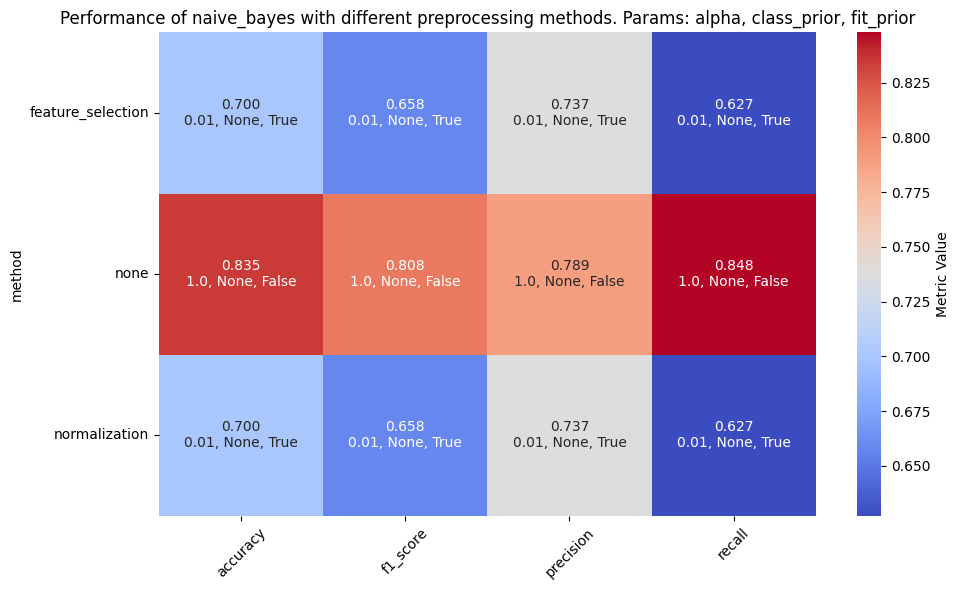

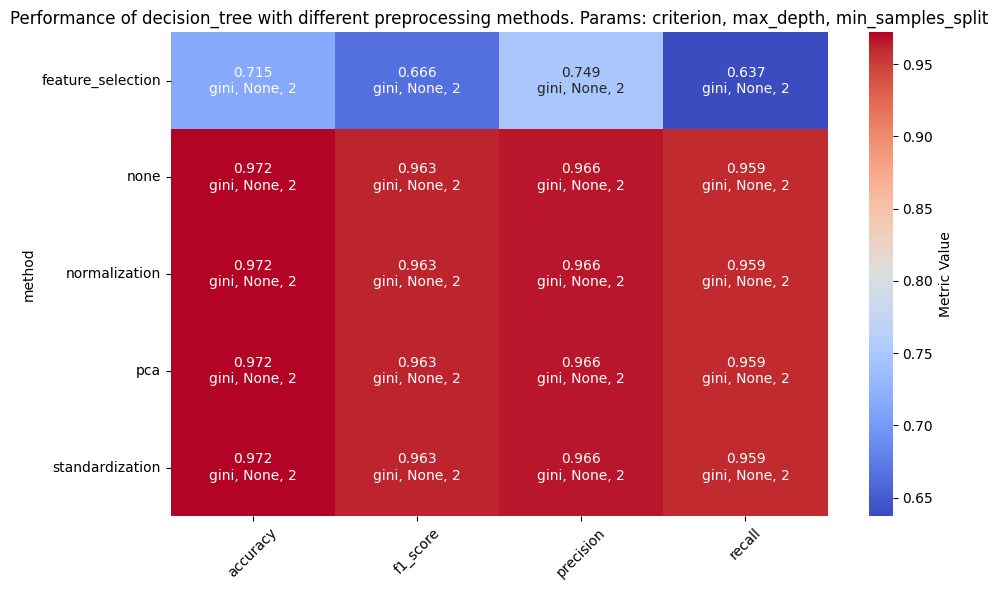

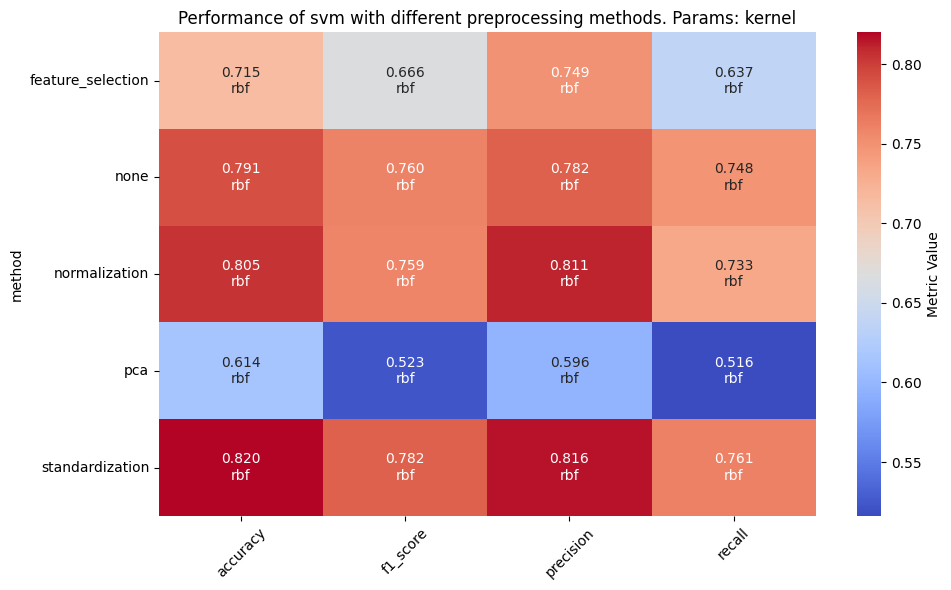

In [91]:
# results_df = pd.DataFrame(results)
# results_df.head

# metrics = ['precision', 'recall', 'f1_score', 'accuracy']
# results_pivot = results_df.pivot(index='metric', columns='method', values=metrics)
# fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

# for idx, classifier in enumerate(classifiers.keys()):
#     sns.heatmap(results_pivot[classifier], annot=True, cmap='coolwarm', ax=axes[idx])
#     axes[idx].set_title(classifier.capitalize())
#     axes[idx].set_xlabel('Preprocessing Method')
#     axes[idx].set_ylabel('Classifier')

# plt.suptitle('Classifiers Performance Comparison with Different Preprocessing Methods')
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()
import textwrap
import os
from pathlib import Path

for result in results:
    result['best_params_str'] = ', '.join(str(value) for value in result['best_params'].values())
    # result['param_names'] = ', '.join(str(value) for value in result['best_params'].keys())
    
results_df = pd.DataFrame(results)

# Definicja klasyfikatorów i metryk
classifiers = results_df['classifier'].unique()
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(text, width))

# Tworzenie wykresów dla każdego klasyfikatora
for clf in classifiers:
    clf_results = results_df[results_df['classifier'] == clf]
    pivot_data = pd.pivot_table(clf_results, values=metrics, index='method')

    def annot_function(data):
        annot = []
        for idx, row in data.iterrows():
            annot_row = []
            for col in data.columns:
                value = row[col]
                best_params = clf_results[clf_results['method'] == idx]['best_params_str'].values[0]
                wrapped_params = wrap_text(best_params)
                annot_row.append(f'{value:.3f}\n{wrapped_params}')
            annot.append(annot_row)
        return annot
    
    annot = annot_function(pivot_data)
    
    # Rysowanie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))
    # sns.heatmap(pivot_data, annot=annot, cmap='coolwarm', ax=ax, cbar_kws={'label': 'Metric Value'}, annot_kws={"size": 10})
    sns.heatmap(pivot_data, annot=annot, fmt='', cmap='coolwarm', ax=ax, cbar_kws={'label': 'Metric Value'}, annot_kws={"size": 10})
    ax.set_title(f'Performance of {clf} with different preprocessing methods. Params: {', '.join(str(key) for key in clf_results['best_params'].iloc[0].keys())}')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    chartFilePath = Path(f'C:\\Users\\Kris\\Documents\\Studia\\Semestr_VI\\Sztuczna_inteligencja\\Laboratorium\\Lab_4_machine_learning\\Charts\\{clf}_matrix.png')
    if os.path.isfile(chartFilePath):
        os.remove(chartFilePath)

    plt.savefig(chartFilePath, dpi=300)
    plt.show()

In [144]:
# X_train_pca_10 = PCA(n_components=10).fit_transform(X_train)
# X_test_pca_10 = PCA(n_components=10).transform(X_test)

# results_pca_10 = []

# for method, (X_train_transformed, X_test_transformed) in processed_data.items():
#     for name, gs in grid_searches.items():
#         if not ((method=="standardization" or method=="pca") and name=="naive_bayes"):
#             print(f"current method: {method}, classifier: {name}")
#             gs.fit(X_train_pca_10, y_train)
#             cv_results = gs.cv_results_
#             y_pred = .best_estimator_.predict(X_test_pca_10)
            
#             accuracy = accuracy_score(y_test, y_pred)
#             precision = precision_score(y_test, y_pred, average='macro')
#             recall = recall_score(y_test, y_pred, average='macro')
#             f1 = f1_score(y_test, y_pred, average='macro')
            
#             results_pca_10.append({
#                 'method': method,
#                 'classifier': name,
#                 'best_params': gs.best_params_,
#                 'accuracy': accuracy,
#                 'precision': precision,
#                 'recall': recall,
#                 'f1_score': f1
#             })